# Produces graphs like CMD, L functions etc.

In [1]:
%matplotlib inline
import numpy as np
from astropy import stats
import pandas as pd
import glob, os
import nway
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.stats import gaussian_kde
from scipy.stats import halfnorm
from astropy.stats.histogram import knuth_bin_width
from scipy.optimize import curve_fit
from astropy import units as u
from astropy.io import ascii, fits
from astropy.table import join, hstack, Table, Column, vstack
from astropy.coordinates import Angle, Latitude, Longitude, SkyCoord

# Set colour palette & plot layouts
import seaborn as sns     #; sns.set()
sns.set_context("paper")   # "paper", "notebook", "talk", "poster"

# Catalogue Operations

In [49]:
# Read in the file with the clean data
clean_file = 'good_data_flagged.csv'
clean_data = ascii.read(clean_file, data_start=1)
#print(np.max(clean_data['mag_36_1']))
#print(np.max(clean_data['mag_36_3']))
#print(np.max(clean_data['mag_36_4']))
#print(np.max(clean_data['mag_45_1']))
#print(np.max(clean_data['mag_45_3']))
#print(np.max(clean_data['mag_45_4']))

# Read in background M31 file
bgd_file = 'good_bgd_data.csv'
bgd_data = ascii.read(bgd_file, data_start=1)
print(np.max(bgd_data['mag_36_0']))
print(np.max(bgd_data['mag_45_0']))

19.01750491
19.41855224


In [50]:
from scipy.stats import binned_statistic as binstat
bins_mag=np.arange(14,20.5,0.5) #Nothing fainter than 20 so last bin is 19.5 to 20

# Find C_i_M31
bin_counts_36_0, bin_edges_36_0, binnumber_36_0 = binstat(bgd_data['mag_36_0'],values=None,statistic='count',bins=bins_mag)
print("36_0: ",bin_counts_36_0)
bin_counts_45_0, bin_edges_45_0, binnumber_45_0 = binstat(bgd_data['mag_45_0'],values=None,statistic='count',bins=bins_mag)
print("45_0: ",bin_counts_45_0)

# Find C_i_M32
bin_counts_36_mean, bin_edges_36_mean, binnumber_36_mean = binstat(clean_data['mean_mag_36'],values=None,statistic='count',bins=bins_mag)
print("36_mean: ",bin_counts_36_mean)
bin_counts_45_mean, bin_edges_45_mean, binnumber_45_mean = binstat(clean_data['mean_mag_45'],values=None,statistic='count',bins=bins_mag)
print("45_mean: ",bin_counts_45_mean)
# Don't need to remove bad data here as we are only counting sources in the specified region (!=-99)
bin_counts_36_1, bin_edges_36_1, binnumber_36_1 = binstat(clean_data['mag_36_1'],values=None,statistic='count',bins=bins_mag)
print("36_1: ",bin_counts_36_1)
bin_counts_45_1, bin_edges_45_1, binnumber_45_1 = binstat(clean_data['mag_45_1'],values=None,statistic='count',bins=bins_mag)
print("45_1: ",bin_counts_45_1)
bin_counts_36_3, bin_edges_36_3, binnumber_36_3 = binstat(clean_data['mag_36_3'],values=None,statistic='count',bins=bins_mag)
print("36_3: ",bin_counts_36_3)
bin_counts_45_3, bin_edges_45_3, binnumber_45_3 = binstat(clean_data['mag_45_3'],values=None,statistic='count',bins=bins_mag)
print("45_3: ",bin_counts_45_3)
bin_counts_36_4, bin_edges_36_4, binnumber_36_4 = binstat(clean_data['mag_36_4'],values=None,statistic='count',bins=bins_mag)
print("36_4: ",bin_counts_36_4)
bin_counts_45_4, bin_edges_45_4, binnumber_45_4 = binstat(clean_data['mag_45_4'],values=None,statistic='count',bins=bins_mag)
print("45_4: ",bin_counts_45_4)

cf_list_36_M31 = np.array([0.986878793,0.989802525,0.986566186,0.977756286,0.971537949,0.952799479,
                         0.912958115,0.833938594,0.730043061,0.608327912,0.43113577,0.276047611])
cf_list_45_M31 = np.array([0.99396608,0.992516675,0.98988764,0.981939473,0.970317793,0.929207841,
                         0.861268781,0.776867628,0.663057531,0.483034258,0.302808898,0.205102551])
cf_list_36_M32 = np.array([0.987698868,0.990127852,0.982634338,0.971949057,0.95539281,0.916341146,
                       0.849149215,0.737867283,0.612454455,0.457784285,0.297650131,0.198858075])
cf_list_45_M32 = np.array([0.993637847,0.993187579,0.986484259,0.979598498,0.957607995,0.917121588,
                       0.833498513,0.722687668,0.569235794,0.390434358,0.260214008,0.188349515])

FnCn_array_36 = (2/3)*bin_counts_36_0*(cf_list_36_M32/cf_list_36_M31)
FnCn_array_45 = (2/3)*bin_counts_45_0*(cf_list_45_M32/cf_list_45_M31)

C_36_1_list = bin_counts_36_1 - FnCn_array_36
print("36_1 corrected",C_36_1_list)
C_36_3_list = bin_counts_36_3 - FnCn_array_36
print("36_3 corrected",C_36_3_list)
C_36_4_list = bin_counts_36_4 - FnCn_array_36
print("36_4 corrected",C_36_4_list)

36_0:  [  3.   4.  27.  80. 284. 464. 612. 557. 193.  16.   2.   0.]
45_0:  [  7.   9.  16.  39. 175. 271. 413. 503. 537. 247.  25.   0.]
36_mean:  [  0.   3.  10.  85. 255. 288. 275. 154.  21.   0.   0.   0.]
45_mean:  [  2.   2.  13.  42. 164. 235. 225. 256. 144.   8.   0.   0.]
36_1:  [  0.   1.  16.  81. 241. 288. 273. 126.  23.   1.   0.   0.]
45_1:  [  2.   3.   9.  42. 174. 211. 239. 240. 114.  15.   0.   0.]
36_3:  [  0.   3.  11.  67. 192. 247. 219. 100.  17.   0.   0.   0.]
45_3:  [  2.   2.   8.  46. 133. 215. 186. 196. 110.  11.   0.   0.]
36_4:  [  0.   2.  13.  67. 212. 227. 233. 105.  19.   0.   0.   0.]
45_4:  [  0.   2.   9.  43. 132. 208. 194. 190. 112.  18.   1.   0.]
36_1 corrected [  -2.00166196   -1.66754314   -1.92826303   27.98343157   54.81303165
   -9.49686834 -106.4838712  -202.55502758  -84.94222618   -7.02697407
   -0.92051476    0.        ]
36_3 corrected [  -2.00166196    0.33245686   -6.92826303   13.98343157    5.81303165
  -50.49686834 -160.4838712  -2

In [51]:
for i in range(3):
    print(bgd_data['mag_45_0'][i])

17.52255224
17.56455224
16.81055224


In [52]:
bin_idx=np.where((bgd_data['mag_45_0']<18)&(bgd_data['mag_45_0']>=17.5))
print(len(bin_idx[0]))

503


Number of variable sources:  51
Number of variable sources as % of entire catalogue:  4.674610449129239
Variable in all 3 pairs of epochs:  2

Dust production rate:  3.01e-10 M_sol/yr
Dust production rate limits:  1.12e-10  -  8.04e-10 M_sol/yr

Dust production rate:  4.01e-10 M_sol/yr
Dust production rate limits:  1.70e-10  -  9.46e-10 M_sol/yr


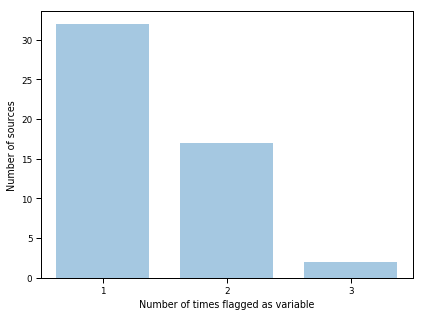

In [77]:
# Estimate dust budget for variable stars
clean_data['variable_times']=clean_data['variable_1_3']+clean_data['variable_1_4']+clean_data['variable_3_4']

ig = plt.figure(figsize=(6,4.5))
bins = np.arange(5) - 0.5 #add one for Python limit, one due to 0.5 shift
#bins = [1,2,3,4]
ax = sns.distplot(clean_data['variable_times'][np.where(clean_data['variable_times']>0)] ,kde=False, bins=bins,
                 hist_kws={"rwidth":0.75})
#ax = sns.countplot(pr_data[param_best_name], color='steelblue')
#ax.set_yscale('log')
ax.set_xlabel('Number of times flagged as variable')
ax.set_ylabel('Number of sources')
plt.tight_layout()
ax.set_xticks([1,2,3])
ax.set_xlim(0.5,3.5)
#save_name = str('hist_'+param_best_name+'.pdf')
#plt.savefig(save_name, bbox_inches='tight')

# Could take sources in the 2 and 3 range as high confidence and those flagging only once as low confidence variables...

# Take mean colour of all sources that are variable (currently any of those on histogram)
# Assume we use mean colour of the entire data set pertaining to a variable source (not just epochs classes as variables)
variable_source_idx = np.where(clean_data['variable_times']>0)
print("Number of variable sources: ",len(variable_source_idx[0]))
print("Number of variable sources as % of entire catalogue: ",100*len(variable_source_idx[0])/len(clean_data))
test_idx = np.where(clean_data['variable_times']==3)
print("Variable in all 3 pairs of epochs: ",len(test_idx[0]))

# Find sources claiming to be variable in a number of pairs of epochs
print("")
mean_colour_array_123 = clean_data['mean_mag_36'][variable_source_idx]-clean_data['mean_mag_45'][variable_source_idx]
mean_colour_variables_123 = np.mean(mean_colour_array_123)
std_colour_variables_123 = np.std(mean_colour_array_123)
D=np.power(10,-9.5+(1.4*mean_colour_variables_123))
D=np.format_float_scientific(D,2)
print("Dust production rate: ",D,"M_sol/yr")
D_low = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_variables_123-std_colour_variables_123))),2)
D_high = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_variables_123+std_colour_variables_123))),2)
print("Dust production rate limits: ",D_low," - ",D_high,"M_sol/yr")

print("")
var_23_idx = np.where(clean_data['variable_times']>1)
mean_colour_array_23 = clean_data['mean_mag_36'][var_23_idx]-clean_data['mean_mag_45'][var_23_idx]
mean_colour_variables_23 = np.mean(mean_colour_array_23)
std_colour_variables_23 = np.std(mean_colour_array_23)
D=np.power(10,-9.5+(1.4*mean_colour_variables_23))
D=np.format_float_scientific(D,2)
print("Dust production rate: ",D,"M_sol/yr")
D_low = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_variables_23-std_colour_variables_23))),2)
D_high = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_variables_23+std_colour_variables_23))),2)
print("Dust production rate limits: ",D_low," - ",D_high,"M_sol/yr")

Number of evolved sources:  38
Number of evolved sources as % of entire catalogue:  3.483043079743355
evolved in all 3 epochs:  5

Dust production rate:  5.77e-10 M_sol/yr
Dust production rate limits:  2.73e-10  -  1.22e-09 M_sol/yr

Dust production rate:  8.36e-10 M_sol/yr
Dust production rate limits:  3.99e-10  -  1.75e-09 M_sol/yr


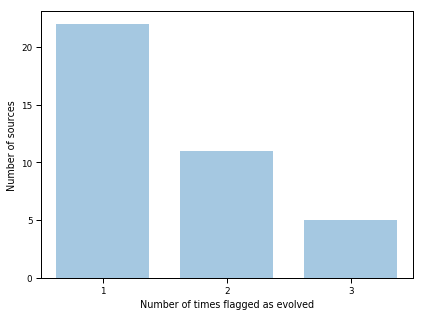

In [79]:
# Estimate dust budget for evoled stars
clean_data['evolved_times']=clean_data['evolved_1']+clean_data['evolved_3']+clean_data['evolved_4']

ig = plt.figure(figsize=(6,4.5))
bins = np.arange(5) - 0.5 #add one for Python limit, one due to 0.5 shift
#bins = [1,2,3,4]
ax = sns.distplot(clean_data['evolved_times'][np.where(clean_data['evolved_times']>0)] ,kde=False, bins=bins,
                 hist_kws={"rwidth":0.75})
#ax = sns.countplot(pr_data[param_best_name], color='steelblue')
#ax.set_yscale('log')
ax.set_xlabel('Number of times flagged as evolved')
ax.set_ylabel('Number of sources')
plt.tight_layout()
ax.set_xticks([1,2,3])
ax.set_xlim(0.5,3.5)
#save_name = str('hist_'+param_best_name+'.pdf')
#plt.savefig(save_name, bbox_inches='tight')

# Could take sources in the 2 and 3 range as high confidence and those flagging only once as low confidence evolveds...

# Take mean colour of all sources that are evolved (currently any of those on histogram)
# Assume we use mean colour of the entire data set pertaining to a evolved source (not just epochs classes as evolved)
evolved_source_idx = np.where(clean_data['evolved_times']>0)
print("Number of evolved sources: ",len(evolved_source_idx[0]))
print("Number of evolved sources as % of entire catalogue: ",100*len(evolved_source_idx[0])/len(clean_data))
test_idx = np.where(clean_data['evolved_times']==3)
print("evolved in all 3 epochs: ",len(test_idx[0]))

# Find sources claiming to be evolved in a number of epochs
print("")
mean_colour_array_123 = clean_data['mean_mag_36'][evolved_source_idx]-clean_data['mean_mag_45'][evolved_source_idx]
mean_colour_evolveds_123 = np.mean(mean_colour_array_123)
std_colour_evolveds_123 = np.std(mean_colour_array_123)
D=np.power(10,-9.5+(1.4*mean_colour_evolveds_123))
D=np.format_float_scientific(D,2)
print("Dust production rate: ",D,"M_sol/yr")
D_low = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_evolveds_123-std_colour_evolveds_123))),2)
D_high = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_evolveds_123+std_colour_evolveds_123))),2)
print("Dust production rate limits: ",D_low," - ",D_high,"M_sol/yr")

print("")
var_23_idx = np.where(clean_data['evolved_times']>1)
mean_colour_array_23 = clean_data['mean_mag_36'][var_23_idx]-clean_data['mean_mag_45'][var_23_idx]
mean_colour_evolveds_23 = np.mean(mean_colour_array_23)
std_colour_evolveds_23 = np.std(mean_colour_array_23)
D=np.power(10,-9.5+(1.4*mean_colour_evolveds_23))
D=np.format_float_scientific(D,2)
print("Dust production rate: ",D,"M_sol/yr")
D_low = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_evolveds_23-std_colour_evolveds_23))),2)
D_high = np.format_float_scientific(np.power(10,-9.5+(1.4*(mean_colour_evolveds_23+std_colour_evolveds_23))),2)
print("Dust production rate limits: ",D_low," - ",D_high,"M_sol/yr")

15
35
22


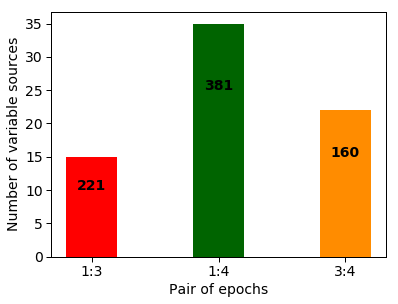

In [110]:
# Histogram of variables in each epoch pair
# NB: can check these numbers from _clean.ipynb when variables were assigned
var_num_1_3 = len((np.where(clean_data['variable_1_3']==1))[0])
print(var_num_1_3)
var_num_1_4 = len((np.where(clean_data['variable_1_4']==1))[0])
print(var_num_1_4)
var_num_3_4 = len((np.where(clean_data['variable_3_4']==1))[0])
print(var_num_3_4)
number_spread = np.array([var_num_1_3,var_num_1_4,var_num_3_4])

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=14)
ig = plt.figure(figsize=(6,4.5))

bars = ('1:3', '1:4', '3:4')
# Choose the position of each barplots on the x-axis (space=1,4,3,1)
y_pos = [1,3,5]
# Create bars
plt.bar(y_pos, number_spread,color=['red','darkgreen','darkorange'])
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xlabel("Pair of epochs")
plt.ylabel("Number of variable sources")

# Add baselines to the bars
plt.annotate("221", [1, 10], horizontalalignment='center', size=14, color='black',weight='bold')
plt.annotate("381", [3, 25], horizontalalignment='center', size=14, color='black',weight='bold')
plt.annotate("160", [5, 15], horizontalalignment='center', size=14, color='black',weight='bold')
 
# Show graphic
plt.show()

In [100]:
# Find variable sources!
# Class a source as variable if it shows variability in at least one epoch pair
# Variable source index defined above in variable section (histogram)
variable_data = clean_data[variable_source_idx]
print("Number of variables identified:",len(variable_data))

Number of variables identified: 51


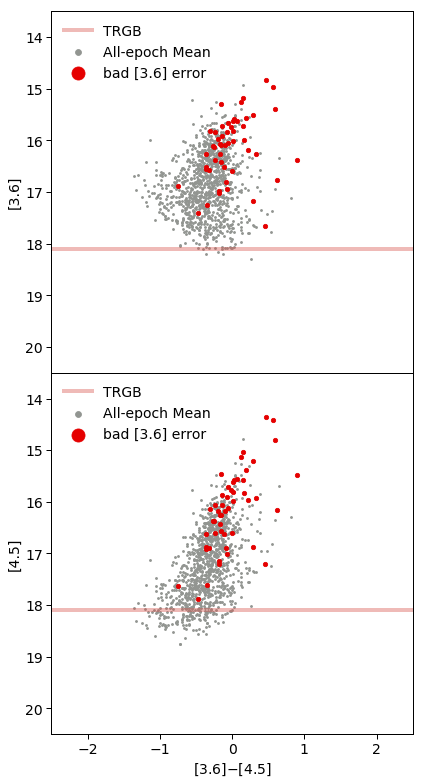

In [101]:
# Mean CMD with variables overplotted

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=14)
plt.figure(figsize=(6,11))

plt.subplot(2,1,1)
# Plot all sensible stars
plt.scatter(clean_data['mean_mag_36']-clean_data['mean_mag_45'], clean_data['mean_mag_36'], s=3.9,color=sns.xkcd_rgb['grey'], label="All-epoch Mean")
# Overplot variable sources
plt.scatter(variable_data['mean_mag_36']-variable_data['mean_mag_45'], variable_data['mean_mag_36'],s=19,color=sns.xkcd_rgb['red'],label="bad [3.6] error")
#plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.ylabel("[3.6]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
#Add TRGB
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
#plt.axvline(x=1.5)
#plt.axvline(x=-1.6)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
#plt.title('M32 E3', fontsize=18)
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
#plt.tight_layout()
#plt.show()
#plt.close()


# Repeat for 4.5 on the y-axis
plt.subplot(2,1,2)
#plt.rc('font', family='sans-serif')
#plt.rc("xtick", labelsize=14)
#plt.rc("ytick", labelsize=14)
#plt.rc("axes", labelsize=14)
#plt.rc("legend", fontsize=14)
#plt.figure(figsize=(6,6))
# Plot all sensible stars
plt.scatter(clean_data['mean_mag_36']-clean_data['mean_mag_45'], clean_data['mean_mag_45'], s=3.9,color=sns.xkcd_rgb['grey'], label="All-epoch Mean")
# Overplot variable sources
plt.scatter(variable_data['mean_mag_36']-variable_data['mean_mag_45'], variable_data['mean_mag_45'],s=19,color=sns.xkcd_rgb['red'],label="bad [3.6] error")
plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.ylabel("[4.5]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
#plt.axvline(x=1.5)
#plt.axvline(x=-1.6)
#Add TRGB
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
#plt.title('M32 E3', fontsize=18)
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.show()
plt.close()

# Variability

In [13]:
# Create a gaussian function
def gaussian(x, a, b, c):
    val = a * np.exp(-(x - b)**2 / c**2)
    return val

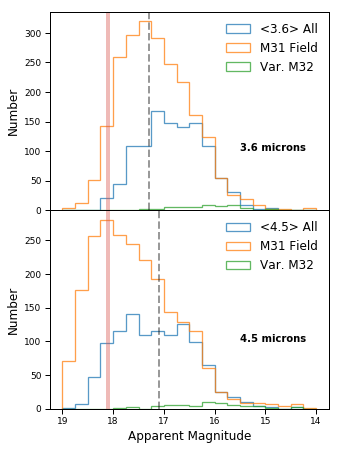

In [105]:
def set_pub():
    """
    Set up some great plot perameters
    """
    plt.rc('font', family='sans-serif')
    #plt.rc("text",  usetex=True)         # Allows latex commands
    plt.rc("xtick", labelsize=11)
    plt.rc("ytick", labelsize=11)
    plt.rc("axes", labelsize=10)
    plt.rc("legend", fontsize=10)
    plt.rc('savefig', dpi=400)           # Higher res outputs for journals
    # plt.rcdefaults()                   # Resets the parameters to their default values

    # For single column figures:
    width = 3.8
    height = width / 1.7

set_pub()


# Setting up plotting sizes

# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=12)
# plt.rcdefaults()                    # Resets the parameters to their default values



# Setting up figure
#fig = plt.figure(figsize=(8, 8))
#fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(5, 10/1.37))
#ax0 = plt.gca()  # Sets up active plot region

# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

############################################################################################################
# Plot a ladder luminosity function of just the core region

# Set up the bin spacing
bw = stats.knuth_bin_width(clean_data['mean_mag_36'])  # Determinal optimal bin size
#bins = np.linspace(12, 20, 31)  # Bin start, end, number +1
bins = np.linspace(14, 19, 21)  # Bin start, end, number +1
############################################################################################################


n, edg, patches = ax1.hist(clean_data['mean_mag_36'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="<3.6> All", ls="solid")
n, edg, patches = ax1.hist(bgd_data['mag_36_0'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="M31 Field", ls="solid")
n, edg, patches = ax1.hist(variable_data['mean_mag_36'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Var. M32", ls="solid")

#n, edg, patches = ax1.hist(colddata['[3.6]'], bins,  # facecolor='g', edgecolor='b',
#                          lw=1.3, alpha=1.75, histtype='step', label="E0 [3.6]", ls="solid")

#ax1.set_xlabel("Apparent Magnitude", fontsize=12)
ax1.set_ylabel("Number", fontsize=12)

#ax1.set_ylim(0,170)

#Add 80% Completness limit
ax1.axvline(x=17.3, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)

#Add TRGB
ax1.axvline(x=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4)

#Set legend
ax1.legend(loc=0, frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

# Add wavlength to the panel
ax1.annotate("3.6 microns", [15.5, 100], horizontalalignment='left', size='medium', color='black',weight='bold')




n, edg, patches = ax2.hist(clean_data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="<4.5> All", ls="solid")
n, edg, patches = ax2.hist(bgd_data['mag_45_0'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="M31 Field", ls="solid")
n, edg, patches = ax2.hist(variable_data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Var. M32", ls="solid")

#n, edg, patches = ax2.hist(colddata['[4.5]'], bins,  # facecolor='g', edgecolor='b',
#                         lw=1.3, alpha=1.75, histtype='step', label="E0 [4.5]", ls="solid")

ax2.set_xlabel("Apparent Magnitude", fontsize=12)
ax2.set_ylabel("Number", fontsize=12)
#ax2.set_ylim(0,169)

#Add 80% Completness limit
ax2.axvline(x=17.1, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)

#Add TRGB
ax2.axvline(x=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4)

#Set legend
ax2.legend(loc=0, frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

# Add wavlength to the panel
ax2.annotate("4.5 microns", [15.5, 100], horizontalalignment='left', size='medium', color='black',weight='bold')


plt.gca().invert_xaxis()    # flip the x-axis

#plt.savefig("bla.pdf", bbox_inches='tight')
#plt.tight_layout()
plt.show()
plt.close()


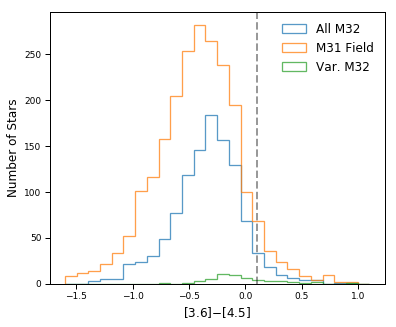

In [108]:
# Setting up plotting sizes

# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=12)
# plt.rcdefaults()                    # Resets the parameters to their default values



# Setting up figure
fig = plt.figure(figsize=(6, 5))
ax1 = plt.gca()  # Sets up active plot region

############################################################################################################
# Plot a ladder luminosity function of just the core region

# Set up the bin spacing
bw = stats.knuth_bin_width(clean_data['mean_mag_36']-clean_data['mean_mag_45'])  # Determinal optimal bin size
bins = np.linspace(-1.6, 1.1, 27)  # Bin start, end, number +1
#bins = np.linspace(12, 20, 41)  # Bin start, end, number +1
############################################################################################################


n, edg, patches = ax1.hist(clean_data['mean_mag_36']-clean_data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="All M32", ls="solid")
n, edg, patches = ax1.hist(bgd_data['mag_36_0']-bgd_data['mag_45_0'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="M31 Field", ls="solid")
n, edg, patches = ax1.hist(variable_data['mean_mag_36']-variable_data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="Var. M32", ls="solid")

#n, edg, patches = ax1.hist(colddata['[3.6]'], bins,  # facecolor='g', edgecolor='b',
#                          lw=1.3, alpha=1.75, histtype='step', label="E0 [3.6]", ls="solid")

ax1.set_xlabel('[3.6]$-$[4.5]', fontsize=12)
ax1.set_ylabel("Number of Stars", fontsize=12)

#Add 80% Completness limit
ax1.axvline(x=0.1, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)

#Set legend
ax1.legend(loc=0, frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

#plt.savefig("bla.pdf", bbox_inches='tight')
#plt.tight_layout()
plt.show()
plt.close()


# NB cell below has data replaced with prob_data

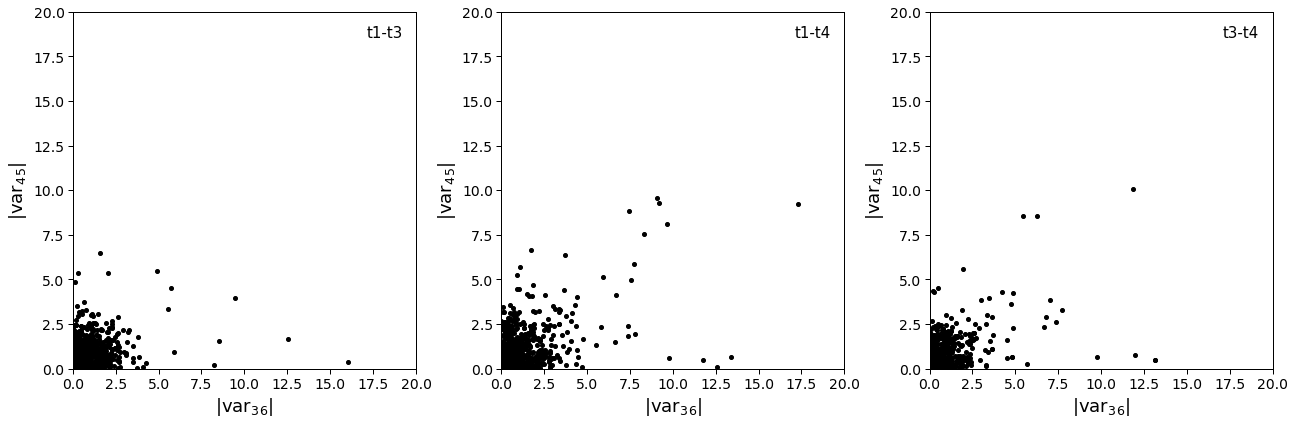

In [55]:
good_var_1_3_idx = np.where((data['var_36_1_3']!=-99) & (data['var_45_1_3']!=-99))
good_var_1_4_idx = np.where((data['var_36_1_4']!=-99) & (data['var_45_1_4']!=-99))
good_var_3_4_idx = np.where((data['var_36_3_4']!=-99) & (data['var_45_3_4']!=-99))

# Setting up figure
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=15)
plt.figure(figsize=(18,6))
ax = plt.gca()                        # Sets up active plot region

# Make the actual plot
plt.subplot(1,3,1)
plt.plot(data['var_36_1_3_abs'][good_var_1_3_idx], data['var_45_1_3_abs'][good_var_1_3_idx], 'o', color='black', ms=4, label="t1-t3")
plt.xlabel('|var$_3$$_6$|', size=18)
plt.ylabel('|var$_4$$_5$|', size=18)
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=0.)
#plt.title('M32 epochs 1 & 3',fontsize=18)
plt.xlim(0,20)
plt.ylim(0,20)

plt.subplot(1,3,2)
plt.plot(data['var_36_1_4_abs'][good_var_1_4_idx], data['var_45_1_4_abs'][good_var_1_4_idx], 'o', color='black', ms=4, label="t1-t4")
plt.xlabel('|var$_3$$_6$|', size=18)
plt.ylabel('|var$_4$$_5$|', size=18)
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=0.)
#plt.title('M32 epochs 1 & 4',fontsize=18)
plt.xlim(0,20)
plt.ylim(0,20)

plt.subplot(1,3,3)
plt.plot(data['var_36_3_4_abs'][good_var_3_4_idx], data['var_45_3_4_abs'][good_var_3_4_idx], 'o', color='black', ms=4, label="t3-t4")
plt.xlabel('|var$_3$$_6$|', size=18)
plt.ylabel('|var$_4$$_5$|', size=18)
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=0.)
#plt.title('M32 epochs 3 & 4',fontsize=18)
plt.xlim(0,20)
plt.ylim(0,20)

#bbb = sns.jointplot(data['var_36_1_3'][good_var_1_3_idx], data['var_45_1_3'][good_var_1_3_idx], kind="scatter")

#plt.savefig("blah.pdf", bbox_inches='tight')
plt.tight_layout()
plt.show()
plt.close()

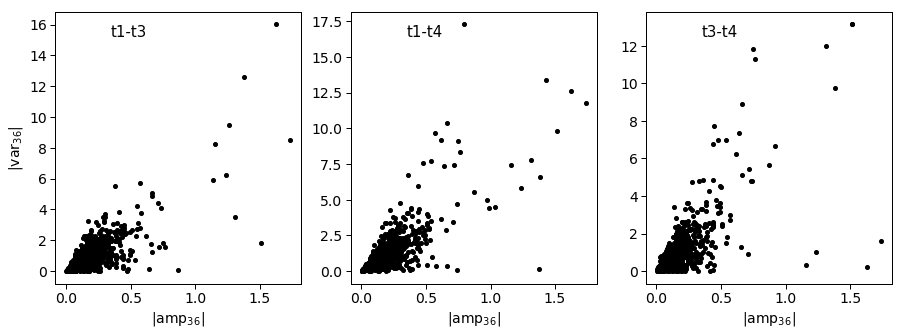

In [72]:
amp_var_36_1_3_idx = np.where((data['amp_36']!=-99) & (data['var_36_1_3']!=-99))
amp_var_36_1_4_idx = np.where((data['amp_36']!=-99) & (data['var_36_1_4']!=-99))
amp_var_36_3_4_idx = np.where((data['amp_36']!=-99) & (data['var_36_3_4']!=-99))

# Setting up figure
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=15)
plt.figure(figsize=(15,5))
ax = plt.gca()                        # Sets up active plot region

# Make the actual plot
plt.subplot(1,3,1)
plt.plot(data['amp_36'][amp_var_36_1_3_idx], data['var_36_1_3_abs'][amp_var_36_1_3_idx], 'o', color='black', ms=4, label="t1-t3")
plt.xlabel('|amp$_3$$_6$|', size=14)
plt.ylabel('|var$_3$$_6$|', size=14)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=0.)

plt.subplot(1,3,2)
plt.plot(data['amp_36'][amp_var_36_1_4_idx], data['var_36_1_4_abs'][amp_var_36_1_4_idx], 'o', color='black', ms=4, label="t1-t4")
plt.xlabel('|amp$_3$$_6$|', size=14)
#plt.ylabel('|var$_3$$_6$|', size=14)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=0.)

plt.subplot(1,3,3)
plt.plot(data['amp_36'][amp_var_36_3_4_idx], data['var_36_3_4_abs'][amp_var_36_3_4_idx], 'o', color='black', ms=4, label="t3-t4")
plt.xlabel('|amp$_3$$_6$|', size=14)
#plt.ylabel('|var$_3$$_6$|', size=14)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=0.)

In [56]:
idx_good_var_36_1_3 = np.where(data['var_36_1_3']!=9999)
def graph(index,col):
    # Setting up figure
    plt.rc('font', family='sans-serif')
    plt.rc("xtick", labelsize=14)
    plt.rc("ytick", labelsize=14)
    plt.rc("axes", labelsize=14)
    plt.rc("legend", fontsize=15)
    plt.figure(figsize=(6,6))
    ax = plt.gca()                        # Sets up active plot region

    # Make the actual plot
    #plt.subplot(1,3,1)
    plt.plot(data['var_36_1_3'][index], data[col][index], 'o', color='black', ms=4)
    plt.xlabel('var_36_1_3', size=18)
    plt.ylabel(col, size=18)
    #plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=0.)
    plt.title('M32'+col,fontsize=18)
    
'''print(len(data.colnames))
for i in range(len(data.colnames)):
    col_name = data.colnames[i]
    idx_good = np.where((data[col_name]!=9999) & (data['var_36_1_3']!=9999))
    graph(idx_good,col_name)'''

"print(len(data.colnames))\nfor i in range(len(data.colnames)):\n    col_name = data.colnames[i]\n    idx_good = np.where((data[col_name]!=9999) & (data['var_36_1_3']!=9999))\n    graph(idx_good,col_name)"